In [1]:
# set working directory
import os
os.chdir('/dat1/openonic/Drifters')

In [2]:
# dependencies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap

import cartopy.crs as ccrs
import cartopy.feature as cfeature


from tqdm import tqdm
import netCDF4 as nc

import scipy.interpolate as sci_int
import scipy.stats as sci_stats
import geopandas as gpd

from scipy.ndimage import gaussian_filter,  generic_filter

In [3]:
# set plotting text size parameters
plt.rcParams.update({
    'axes.titlesize': 30,
    'axes.labelsize': 24, 
    'xtick.labelsize': 18,  
    'ytick.labelsize': 18,  
    'legend.fontsize': 18, 
    'figure.titlesize': 28})

In [5]:
# load data
beach_undrogued = pd.read_csv('undrogued_beach.csv')
unbeach_undrogued = pd.read_csv('undrogued_unbeach.csv')
beach_drogued = pd.read_csv('drogued_beach.csv')
unbeach_drogued = pd.read_csv('drogued_unbeach.csv')
drogued = pd.read_csv('drogued.csv')

In [6]:
# undrogued probability of beaching:

# we follow the steps in the probability of beaching notebook:
# get beached lats and lons
beach_undrogued_lats = np.array(beach_undrogued['lat'])
beach_undrogued_longs = np.array(beach_undrogued['lon'])

# get unbeached lats and lons
unbeach_undrogued_lats = np.array(unbeach_undrogued['lat'])
unbeach_undrogued_longs = np.array(unbeach_undrogued['lon'])

# let's use sci_stats.binned_statistic_2d to bin by lat/lon and count

# beached
n_lons, n_lats = 360, 180 # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

beach_undrogued_stat, x_edge, y_edge, binnumber = sci_stats.binned_statistic_2d(
    beach_undrogued_longs,beach_undrogued_lats,values=beach_undrogued['id'],
    statistic = 'count', bins = [lon_bins,lat_bins])

# unbeached
n_lons, n_lats = 360, 180 # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

unbeach_undrogued_stat, x_edge, y_edge, binnumber = sci_stats.binned_statistic_2d(
    unbeach_undrogued_longs,unbeach_undrogued_lats,values=unbeach_undrogued['id'],
    statistic = 'count', bins = [lon_bins,lat_bins])

def probability_of_beaching(beached_count, unbeached_count):
    probability = beached_count / (beached_count + unbeached_count)
    return probability
probability_undrogued = probability_of_beaching(beach_undrogued_stat, unbeach_undrogued_stat).T

# put into 'beach_prob' dataframe and remove data past -70 and 70 degrees lat:
beach_prob = pd.DataFrame(probability_undrogued)#.iloc[30:-30]
beach_prob_vals = beach_prob.values

probability_undrogued = probability_of_beaching(beach_undrogued_stat, unbeach_undrogued_stat).T

# put into 'beach_prob' dataframe and remove data past -70 and 70 degrees lat:
beach_prob = pd.DataFrame(probability_undrogued)#.iloc[30:-30]
beach_prob_vals = beach_prob.values

def nan_gaussian_filter(values, sigma):
    mask = np.isnan(values)
    values_filled = np.where(mask, np.nanmean(values), values)  # Replace NaNs with the mean of non-NaNs
    filtered = gaussian_filter(values_filled, sigma=sigma)
    filtered[mask] = np.nan  # Restore NaNs
    return filtered

# Apply the custom Gaussian filter
prob_undrogued = nan_gaussian_filter(beach_prob_vals, sigma=0.5)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


In [7]:
# drogued probability of beaching:

# adapt the steps in the probability of beaching notebook for drogued data:
beach_drogued_lats = np.array(beach_drogued['lat'])
beach_drogued_longs = np.array(beach_drogued['lon'])

# get unbeached lats and lons
unbeach_drogued_lats = np.array(unbeach_drogued['lat'])
unbeach_drogued_longs = np.array(unbeach_drogued['lon'])

# let's use sci_stats.binned_statistic_2d to bin by lat/lon and count

# beached
n_lons, n_lats = 360, 180 # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

beach_drogued_stat, x_edge, y_edge, binnumber = sci_stats.binned_statistic_2d(
    beach_drogued_longs,beach_drogued_lats,values=beach_drogued['id'],
    statistic = 'count', bins = [lon_bins,lat_bins])

# unbeached
n_lons, n_lats = 360, 180 # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

unbeach_drogued_stat, x_edge, y_edge, binnumber = sci_stats.binned_statistic_2d(
    unbeach_drogued_longs,unbeach_drogued_lats,values=unbeach_drogued['id'],
    statistic = 'count', bins = [lon_bins,lat_bins])

def probability_of_beaching(beached_count, unbeached_count):
    probability = beached_count / (beached_count + unbeached_count)
    return probability
probability_drogued = probability_of_beaching(beach_drogued_stat, unbeach_drogued_stat).T

# put into 'beach_prob' dataframe and remove data past -70 and 70 degrees lat:
beach_prob = pd.DataFrame(probability_drogued)#.iloc[30:-30]
beach_prob_vals = beach_prob.values

probability_drogued = probability_of_beaching(beach_drogued_stat, unbeach_drogued_stat).T

# put into 'beach_prob' dataframe and remove data past -70 and 70 degrees lat:
beach_prob = pd.DataFrame(probability_drogued)#.iloc[30:-30]
beach_prob_vals = beach_prob.values

def nan_gaussian_filter(values, sigma):
    mask = np.isnan(values)
    values_filled = np.where(mask, np.nanmean(values), values)  # Replace NaNs with the mean of non-NaNs
    filtered = gaussian_filter(values_filled, sigma=sigma)
    filtered[mask] = np.nan  # Restore NaNs
    return filtered

# Apply the custom Gaussian filter
prob_drogued = nan_gaussian_filter(beach_prob_vals, sigma=0.5)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


In [9]:
# time to beach:
# undrogued, follow steps in time to beach figure notebook:
# calcualte the max time_to_beach value for each unique trajectory
unique_ids_unbeach = unbeach_undrogued['id'].unique()
unique_ids_beach = beach_undrogued['id'].unique()
#print(len(unique_ids_beach))
max_time_trajs = beach_undrogued.groupby('id')['time_to_beach'].max().reset_index()

# calculate number that beach within a year
beach_within_yr = max_time_trajs[max_time_trajs['time_to_beach'] < 31536000]
print(f'fraction of total undrogued drifters that beach within a year: {np.round(len(beach_within_yr) / (len(unique_ids_beach) + len(unique_ids_unbeach)),4)}')

# set data greater than a yr to 1 yr
def year_to_beach(df):
    year = 31536000 *2 # Number of seconds in 1 year
    filtered_df = df.copy()
  #  filtered_df['time_to_beach'] = df['time_to_beach'].apply(lambda val: year if val > year else val)  
    filtered_df = df[df['time_to_beach'] < year]
    return filtered_df

time_yr = year_to_beach(beach_undrogued)

# set to months:
time_yr_month = time_yr.copy()
time_yr_month['time_to_beach'] = time_yr['time_to_beach'] / 60 / 60 / 24 / 30.43

undrogued_lats = np.array(time_yr_month['lat'])
undrogued_longs = np.array(time_yr_month['lon'])

# let's use sci_stats.binned_statistic_2d to bin by lat/lon and count

n_lons, n_lats = 360, 180 # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

yr_stat, x_edge, y_edge, binnumber = sci_stats.binned_statistic_2d(
    undrogued_longs,undrogued_lats,values=time_yr_month['time_to_beach'],
    statistic = 'mean', bins = [lon_bins,lat_bins])

def nan_gaussian_filter(values, sigma):
    mask = np.isnan(values)
    values_filled = np.where(mask, np.nanmean(values), values)  # Replace NaNs with the mean of non-NaNs
    filtered = gaussian_filter(values_filled, sigma=sigma)
    filtered[mask] = np.nan  # Restore NaNs
    return filtered

# Apply the custom Gaussian filter
time_undrogued = nan_gaussian_filter(pd.DataFrame(yr_stat).values, sigma=0.75)

fraction of total undrogued drifters that beach within a year: 0.2017


In [10]:
# time to beach:
# drogued, adapt the steps in time to beach figure notebook:
# calcualte the max time_to_beach value for each unique trajectory
unique_ids_unbeach = unbeach_drogued['id'].unique()
unique_ids_beach = beach_drogued['id'].unique()
#print(len(unique_ids_beach))
max_time_trajs = beach_drogued.groupby('id')['time_to_beach'].max().reset_index()

# calculate number that beach within a year
beach_within_yr = max_time_trajs[max_time_trajs['time_to_beach'] < 31536000]
print(f'fraction of total drogued drifters that beach within a year: {np.round(len(beach_within_yr) / (len(unique_ids_beach) + len(unique_ids_unbeach)),4)}')

# set data greater than a yr to 1 yr
def year_to_beach(df):
    year = 31536000 *2 # Number of seconds in 1 year
    filtered_df = df.copy()
  #  filtered_df['time_to_beach'] = df['time_to_beach'].apply(lambda val: year if val > year else val)  
    filtered_df = df[df['time_to_beach'] < year]
    return filtered_df

time_yr = year_to_beach(beach_drogued)

# set to months:
time_yr_month = time_yr.copy()
time_yr_month['time_to_beach'] = time_yr['time_to_beach'] / 60 / 60 / 24 / 30.43

drogued_lats = np.array(time_yr_month['lat'])
drogued_longs = np.array(time_yr_month['lon'])

# let's use sci_stats.binned_statistic_2d to bin by lat/lon and count

n_lons, n_lats = 360, 180 # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

yr_stat, x_edge, y_edge, binnumber = sci_stats.binned_statistic_2d(
    drogued_longs,drogued_lats,values=time_yr_month['time_to_beach'],
    statistic = 'mean', bins = [lon_bins,lat_bins])

def nan_gaussian_filter(values, sigma):
    mask = np.isnan(values)
    values_filled = np.where(mask, np.nanmean(values), values)  # Replace NaNs with the mean of non-NaNs
    filtered = gaussian_filter(values_filled, sigma=sigma)
    filtered[mask] = np.nan  # Restore NaNs
    return filtered

# Apply the custom Gaussian filter
time_drogued = nan_gaussian_filter(pd.DataFrame(yr_stat).values, sigma=0.75)

fraction of total drogued drifters that beach within a year: 0.2356


In [11]:
# follow steps from wind_figure notebook:

# load u and v coastal norm component CSVs:
u_df = pd.read_csv('u_df.csv')
v_df = pd.read_csv('v_df.csv')

# load wind CSV:
avg_u_winds = pd.read_csv('avg_u_winds.csv')
avg_v_winds = pd.read_csv('avg_v_winds.csv')

def df_aggregation_by_factor_8(df):
    # keep original df unaffected
    working_df = df.copy()

    # initialize row mean:
    row_means = []
    
    # for each odd row    
    for i in tqdm(range(0, len(working_df), 2)):

        # initialize column mean:
        col_means = []
        
        # for each odd col
        for j in range(0, len(working_df.columns), 2):  

            # get 3x3 matrix around current grid cell
            matrix = working_df.iloc[i-1:i+2, j-1:j+2].values
            
            # get mean of matrix
            matrix_mean = matrix.mean()
            
            col_means.append(matrix_mean)
            
        row_means.append(col_means)
        
    result_df = pd.DataFrame(row_means)
    
    return result_df
# perform aggregation on wind dfs:
#u_winds = df_aggregation_by_factor_8(df_aggregation_by_factor_8(df_aggregation_by_factor_8(avg_u_winds.iloc[:-1,:])))
#v_winds = df_aggregation_by_factor_8(df_aggregation_by_factor_8(df_aggregation_by_factor_8(avg_v_winds.iloc[:-1,:])))
u_winds = df_aggregation_by_factor_8(df_aggregation_by_factor_8(avg_u_winds.iloc[:-1,:]))
v_winds = df_aggregation_by_factor_8(df_aggregation_by_factor_8(avg_v_winds.iloc[:-1,:]))

# flip vertically
u_winds = u_winds.iloc[::-1]
v_winds = v_winds.iloc[::-1]

# shift 180 degrees lon
u_winds =  pd.concat([u_winds.iloc[:, u_winds.shape[1] // 2:], u_winds.iloc[:, :u_winds.shape[1] // 2]], axis=1)
v_winds =  pd.concat([v_winds.iloc[:, v_winds.shape[1] // 2:], v_winds.iloc[:, :v_winds.shape[1] // 2]], axis=1)

# we have a problem: at 0 lon, there's a column of missing data
# this comes from the original data's projection. Let's fill in
# this missing data by interpolating between 0 and 180
u_winds[0] = u_winds[[1, 180]].mean(axis=1)
v_winds[0] = v_winds[[1, 180]].mean(axis=1)


  0%|          | 0/360 [00:00<?, ?it/s]/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice.
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 180/180 [00:06<00:00, 26.04it/s]


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` i

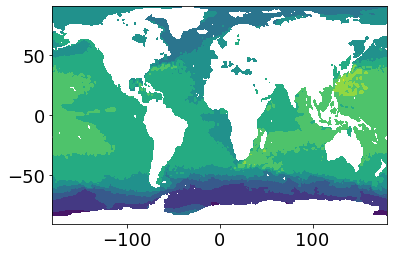

In [12]:
# follow steps from circulation figure notebook:
os.chdir('/home/openonic/global-drifter-program/')
ssh = nc.Dataset('data/ssh.nc')
# Extract the 'adt' variable, and its coordinates
adt_data = ssh.variables['adt'][:]
adt_lons = ssh.variables['longitude'][:]
adt_lats = ssh.variables['latitude'][:]
adt_data_flat = np.array(adt_data).flatten()

# Create longitude and latitude arrays that match the shape of adt_data
lon_points = adt_data.shape[2]  # Number of longitude points
lat_points = adt_data.shape[1]  # Number of latitude points

# Generate latitudes and longitudes that correspond to the grid of adt_data
adt_lons = np.linspace(-180, 180, lon_points)
adt_lats = np.linspace(-90, 90, lat_points)

# Use meshgrid to create full latitude and longitude arrays for each grid point
adt_lons_grid, adt_lats_grid = np.meshgrid(adt_lons, adt_lats)

# Flatten the grids to match adt_data_flat
adt_lons_flat = adt_lons_grid.flatten()
adt_lats_flat = adt_lats_grid.flatten()

# Define binning parameters
n_lons, n_lats = 360, 180
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-95, 85, n_lats + 1) # adjustment for vertical shift error

# Compute binned statistics
adt_stat, x_edge, y_edge, binnumber = sci_stats.binned_statistic_2d(
    adt_lons_flat, adt_lats_flat, adt_data_flat,
    statistic='mean', bins=[lon_bins, lat_bins]
)

# Shift `adt_stat` to center Atlantic
adt_stat = np.roll(adt_stat, shift=adt_stat.shape[0] // 2, axis=0)

circulation = adt_stat.copy()
circulation[adt_stat < -2] = np.nan

# define desired rows and desired cols
desired_rows = 360
desired_cols = 180
# define lat and lon
lats = np.linspace(-90,90,desired_cols)
lons = np.linspace(-180, 180, desired_rows)
plt.contourf(lons, lats, circulation.T)

def lighten_colormap(cmap_name, factor=0.5):
    # Load the original colormap
    cmap = plt.cm.get_cmap(cmap_name)
    # Create a function to interpolate colors and make them lighter
    colors = cmap(np.linspace(0, 1, 256))
    lighter_colors = 1 - factor * (1 - colors[:, :3])  # Move colors toward white
    lighter_cmap = LinearSegmentedColormap.from_list(f"{cmap_name}_lighter", lighter_colors)
    return lighter_cmap
lighter_cividis = lighten_colormap('cividis')

In [13]:
# plotting:

In [14]:
# for figures:
# define desired rows and desired cols
desired_rows = 360
desired_cols = 180
# define lat and lon
lats = np.linspace(-90,90,desired_cols)
lons = np.linspace(-180, 180, desired_rows)

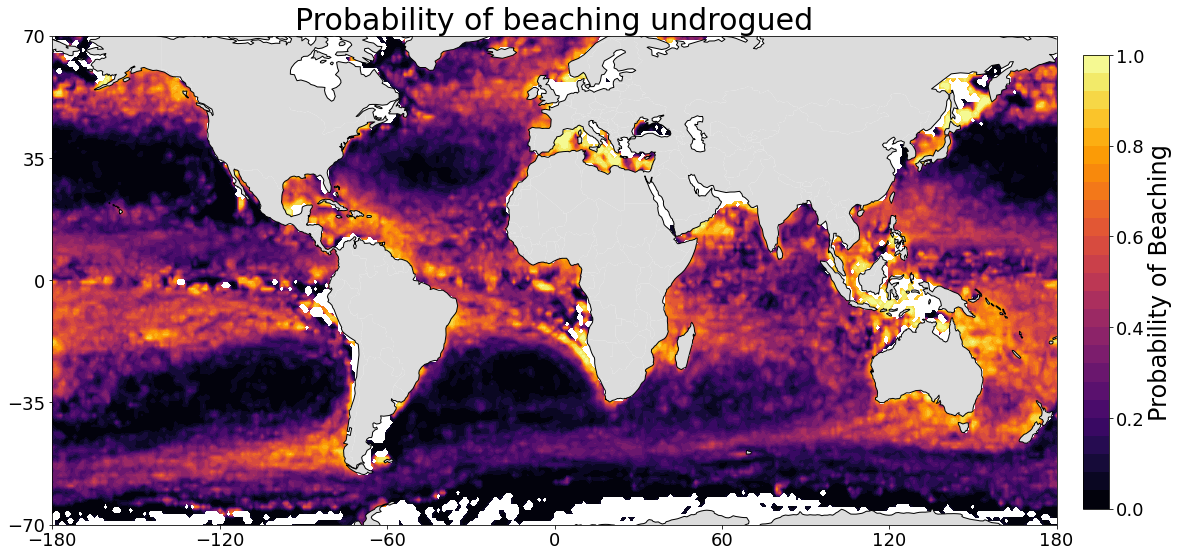

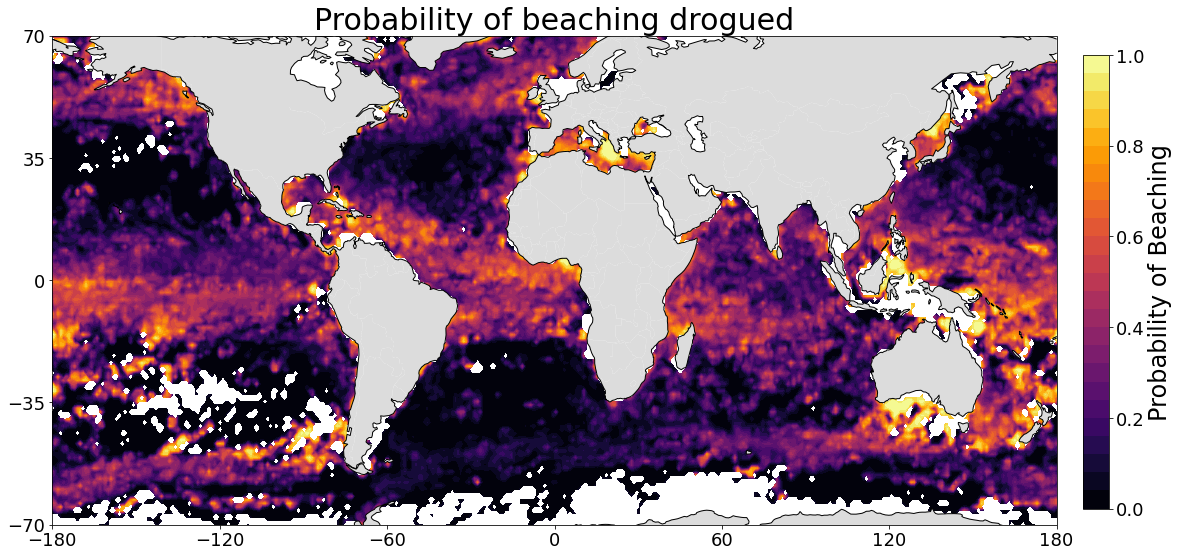

In [15]:
#undrogued
# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
land = world[world['continent'] != 'Antarctica']
Antarctica = world[world['continent'] == 'Antarctica']


# visualize probability of beaching
fig, (ax1) = plt.subplots(1, 1, figsize=(18, 9),
                          subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax1.set_yticks([-70, -35, 0, 35, 70])


cmap = plt.get_cmap('inferno').copy()
ax1.set_extent([-180, 180, -70, 70], crs=ccrs.PlateCarree())
im1 = ax1.contourf(lons, lats, prob_undrogued, cmap=cmap, transform=ccrs.PlateCarree(), 
                   vmin=0, vmax=1.0, levels = 24)


ax1.set_title('Probability of beaching undrogued')
#ax1.set_xlabel('Longitude')
#ax1.set_ylabel('Latitude')

land.plot(ax=ax1, color='gainsboro', edgecolor='none')
Antarctica.plot(ax=ax1, color='gainsboro', edgecolor='none')
ax1.set_aspect('auto')

ax1.coastlines(color = 'black')

# Create a colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, label='Probability of Beaching')
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
im1.set_clim(0, 1.0)  # This sets the color limits for the ScalarMappable

#plt.savefig('probability_of_beaching.png', dpi=300)

# Show the plot
plt.show()


# drogued
# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
land = world[world['continent'] != 'Antarctica']
Antarctica = world[world['continent'] == 'Antarctica']


# visualize probability of beaching
fig, (ax1) = plt.subplots(1, 1, figsize=(18, 9),
                          subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax1.set_yticks([-70, -35, 0, 35, 70])


cmap = plt.get_cmap('inferno').copy()
ax1.set_extent([-180, 180, -70, 70], crs=ccrs.PlateCarree())
im1 = ax1.contourf(lons, lats, prob_drogued, cmap=cmap, transform=ccrs.PlateCarree(), 
                   vmin=0, vmax=1.0, levels = 24)


ax1.set_title('Probability of beaching drogued')
#ax1.set_xlabel('Longitude')
#ax1.set_ylabel('Latitude')

land.plot(ax=ax1, color='gainsboro', edgecolor='none')
Antarctica.plot(ax=ax1, color='gainsboro', edgecolor='none')
ax1.set_aspect('auto')

ax1.coastlines(color = 'black')

# Create a colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, label='Probability of Beaching')
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
im1.set_clim(0, 1.0)  # This sets the color limits for the ScalarMappable

#plt.savefig('probability_of_beaching.png', dpi=300)

# Show the plot
plt.show()

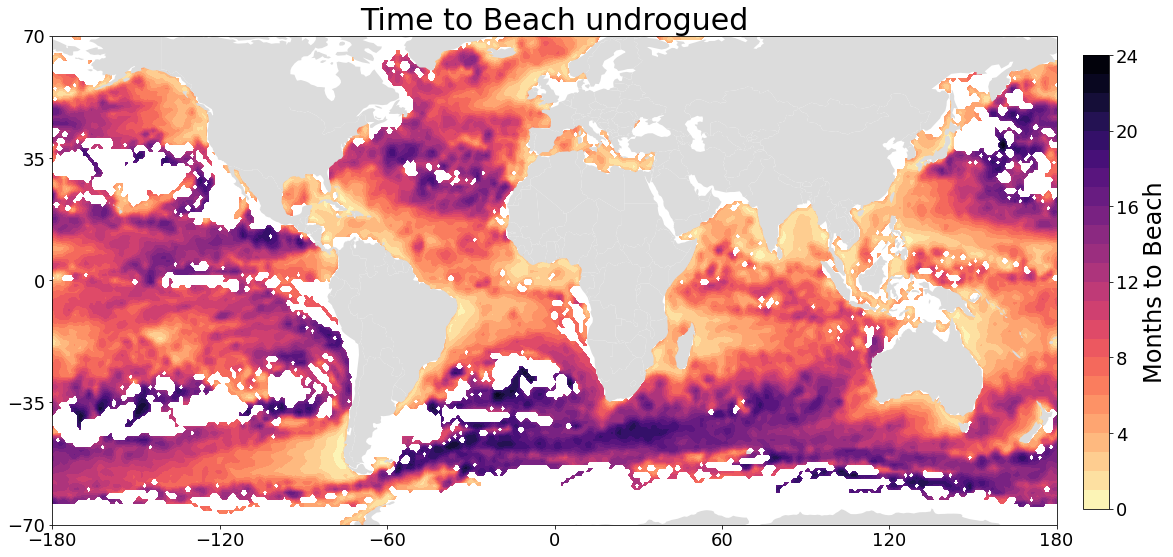

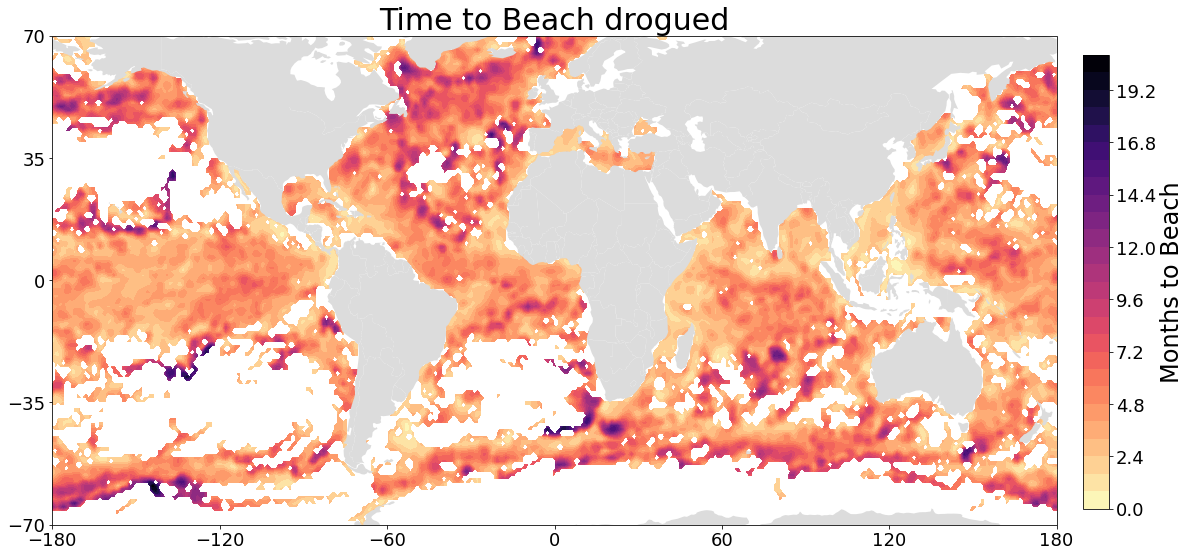

In [23]:
# time:
desired_rows = 360
desired_cols = 180
lats_2 = np.linspace(-90,90,desired_cols)
lons_2 = np.linspace(-180, 180, desired_rows)
# undrogued
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
land = world[world['continent'] != 'Antarctica']
Antarctica = world[world['continent'] == 'Antarctica']

# visualize 1 year to beach
fig, (ax1) = plt.subplots(1, 1, figsize=(18, 9),
                          subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax1.set_yticks([-70, -35, 0, 35, 70])

im1 = ax1.contourf(lons_2, lats_2, time_undrogued.T, cmap='magma_r', 
                   transform=ccrs.PlateCarree(), vmin=0, vmax=24, levels = 24)

ax1.set_title('Time to Beach undrogued')
#ax1.set_xlabel('Longitude')
#ax1.set_ylabel('Latitude')

# Create a colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, label='Months to Beach')
cbar.set_ticks([0, 4, 8, 12, 16, 20, 24])
im1.set_clim(0, 24)  # This sets the color limits for the ScalarMappable

land.plot(ax=ax1, color='gainsboro', edgecolor='none')
Antarctica.plot(ax=ax1, color='gainsboro', edgecolor='none')
ax1.set_aspect('auto')
ax1.set_extent([-180, 180, -70, 70], crs=ccrs.PlateCarree())

#plt.savefig('time_to_beach.png', dpi=300)
# Show the plot
plt.show()



# drogued
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
land = world[world['continent'] != 'Antarctica']
Antarctica = world[world['continent'] == 'Antarctica']

# visualize 1 year to beach
fig, (ax1) = plt.subplots(1, 1, figsize=(18, 9),
                          subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax1.set_yticks([-70, -35, 0, 35, 70])

im1 = ax1.contourf(lons_2, lats_2, time_drogued.T, cmap='magma_r', 
                   transform=ccrs.PlateCarree(),levels=24)#, vmin=0, vmax=24, levels = 24)

ax1.set_title('Time to Beach drogued')
#ax1.set_xlabel('Longitude')
#ax1.set_ylabel('Latitude')

# Create a colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, label='Months to Beach')
#cbar.set_ticks([0, 4, 8, 12, 16, 20, 24])
#im1.set_clim(0, 24)  # This sets the color limits for the ScalarMappable

land.plot(ax=ax1, color='gainsboro', edgecolor='none')
Antarctica.plot(ax=ax1, color='gainsboro', edgecolor='none')
ax1.set_aspect('auto')
ax1.set_extent([-180, 180, -70, 70], crs=ccrs.PlateCarree())

#plt.savefig('time_to_beach.png', dpi=300)
# Show the plot
plt.show()